# **Data Analysis Project: Bike Sharing Dataset**
- Name: Gladis Hafifah
- Email: ghmalliq24@gmail.com
- dicoding Id: fyymaliq

## **Determining the Business Question**

- What is the monthly trend of bike loans in the last 2 years?
- Does the current season affect the number of bicycle loans?
- How does the weather affect the number of bicycle loans?
- What is the bicycle loan population on weekdays and holidays based on registered and casual?
- What is the bicycle loan population on weekdays?
- How do temp, atemp and humidity attributes affect the number of bike loans?

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## **Data Wrangling**

### **Gathering Data**

In [2]:
day = pd.read_csv('datasets/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Checking for missing values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Checking for duplicate data
day.duplicated().any()

False

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Cleaning Data**

In [7]:
drop = ['instant']

for i in day.columns:
  if i in drop:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Change the title name of an attribute
day.rename(columns={'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)
day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
# Convert a value that was previously numeric, into a category
day['season'] = day['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day['year'] = day['year'].map({0: '2011', 1:'2012'})

day['weathersit'] = day['weathersit'].map({1: 'Clear/Partly Cloudy',
                                           2: 'Misty/Cloudy',
                                           3: 'Light Snow/Rain',
                                           4: 'Severe Weather'})
day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Springer,2011,1,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,2011,1,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,2011,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,2011,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,2011,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Change the data type to datetime
day['dateday'] = pd.to_datetime(day.dateday)

# Change data type to categorical
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathersit'] = day.weathersit.astype('category')

day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Springer,2011,1,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,2011,1,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,2011,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,2011,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,2011,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

## **Exploratory Data Analysis (EDA)**

In [12]:
# Categorize by month
day.groupby(by='month').agg({'count': ['max', 'min', 'mean', 'sum']}).T

month                  1              2              3         4  \
count max     4521.00000    5062.000000    8362.000000    7460.0   
      min      431.00000    1005.000000     605.000000     795.0   
      mean    2176.33871    2655.298246    3692.258065    4484.9   
      sum   134933.00000  151352.000000  228920.000000  269094.0   

month                   5              6              7              8  \
count max     8294.000000    8120.000000    8173.000000    7865.000000   
      min     2633.000000    3767.000000    3285.000000    1115.000000   
      mean    5349.774194    5772.366667    5563.677419    5664.419355   
      sum   331686.000000  346342.000000  344948.000000  351194.000000   

month                   9             10             11             12  
count max     8714.000000    8156.000000    6852.000000    6606.000000  
      min     1842.000000      22.000000    1495.000000     441.000000  
      mean    5766.516667    5199.225806    4247.183333    3403.806452  
      sum   345991.000000  322352.000000  254831.000000  211036.000000

In [13]:
# Categorize by weather
day.groupby(by='weathersit').agg({'count': ['max', 'min', 'mean', 'sum']}).T

weathersit  Clear/Partly Cloudy  Light Snow/Rain   Misty/Cloudy
count max          8.714000e+03      4639.000000    8362.000000
      min          4.310000e+02        22.000000     605.000000
      mean         4.876786e+03      1803.285714    4035.862348
      sum          2.257952e+06     37869.000000  996858.000000

In [14]:
# Categorize by holiday
day.groupby(by='holiday').agg({'count': ['max', 'min', 'mean', 'sum']}).T

holiday                0        1
count max   8.714000e+03   7403.0
      min   2.200000e+01   1000.0
      mean  4.527104e+03   3735.0
      sum   3.214244e+06  78435.0

In [15]:
# Categorize by weekday
day.groupby(by='weekday').agg({'count':['max','min','mean']}).T

weekday               0           1            2            3            4  \
count max   8227.000000  7525.00000  7767.000000  8173.000000  7804.000000   
      min    605.000000    22.00000   683.000000   441.000000   431.000000   
      mean  4228.828571  4338.12381  4510.663462  4548.538462  4667.259615   

weekday               5            6  
count max   8362.000000  8714.000000  
      min   1167.000000   627.000000  
      mean  4690.288462  4550.542857

In [16]:
# Categorize by workingday
day.groupby(by='workingday').agg({'count': ['max', 'min', 'mean']}).T

workingday            0        1
count max   8714.000000  8362.00
      min    605.000000    22.00
      mean  4330.168831  4584.82

In [17]:
# Categorize by season
day.groupby(by='season').agg({'casual': 'mean', 'registered': 'mean','count': ['max', 'min', 'mean']}).T

season                  Fall     Springer       Summer       Winter
casual     mean  1202.611702   334.928177  1106.097826   729.112360
registered mean  4441.691489  2269.204420  3886.233696  3999.050562
count      max   8714.000000  7836.000000  8362.000000  8555.000000
           min   1115.000000   431.000000   795.000000    22.000000
           mean  5644.303191  2604.132597  4992.331522  4728.162921

In [18]:
# Categorize temp, hum, and humidity by season
day.groupby(by='season').agg({'temp': ['max', 'min', 'mean'],'atemp': ['max', 'min', 'mean'], 'hum': ['max', 'min', 'mean']}).T

season          Fall  Springer    Summer    Winter
temp  max   0.861667  0.572500  0.808333  0.657500
      min   0.469167  0.059130  0.253043  0.220833
      mean  0.706309  0.297748  0.544405  0.422906
atemp max   0.840896  0.548617  0.757579  0.607975
      min   0.242400  0.079070  0.250339  0.227913
      mean  0.655898  0.296914  0.520307  0.415539
hum   max   0.939565  0.948261  0.922500  0.972500
      min   0.360000  0.000000  0.254167  0.333478
      mean  0.633482  0.582903  0.626948  0.668719

In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

## **Visualization & Explanatory Analysis**

### **Question1: What is the monthly trend of bicycle loans in the last 2 years?**

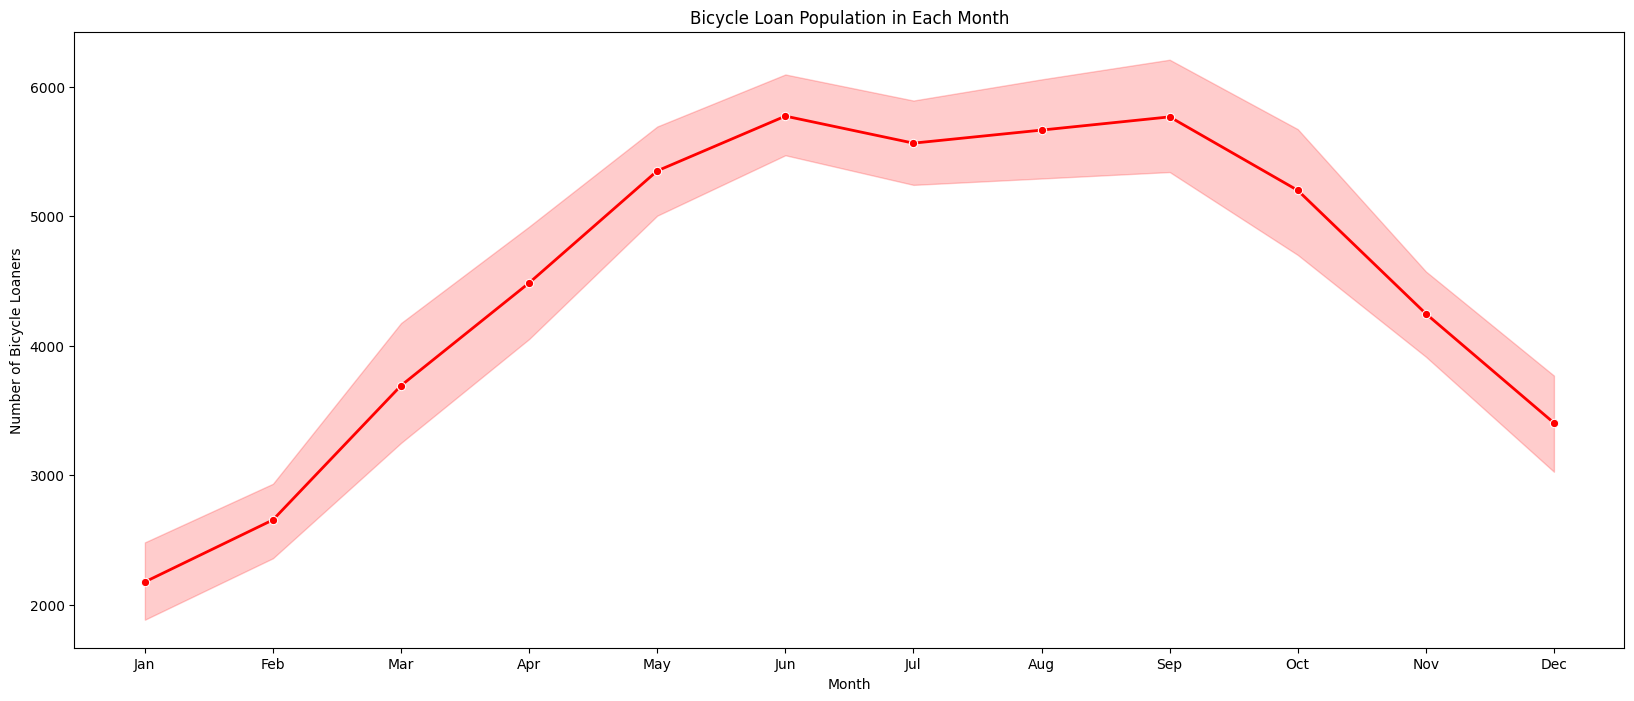

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(x='month', y='count', data=day, marker='o', linewidth=2, color='red')
plt.title('Bicycle Loan Population in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Bicycle Loaners')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### **Question 2: Does the current season have an influence on the number of bike loans?**

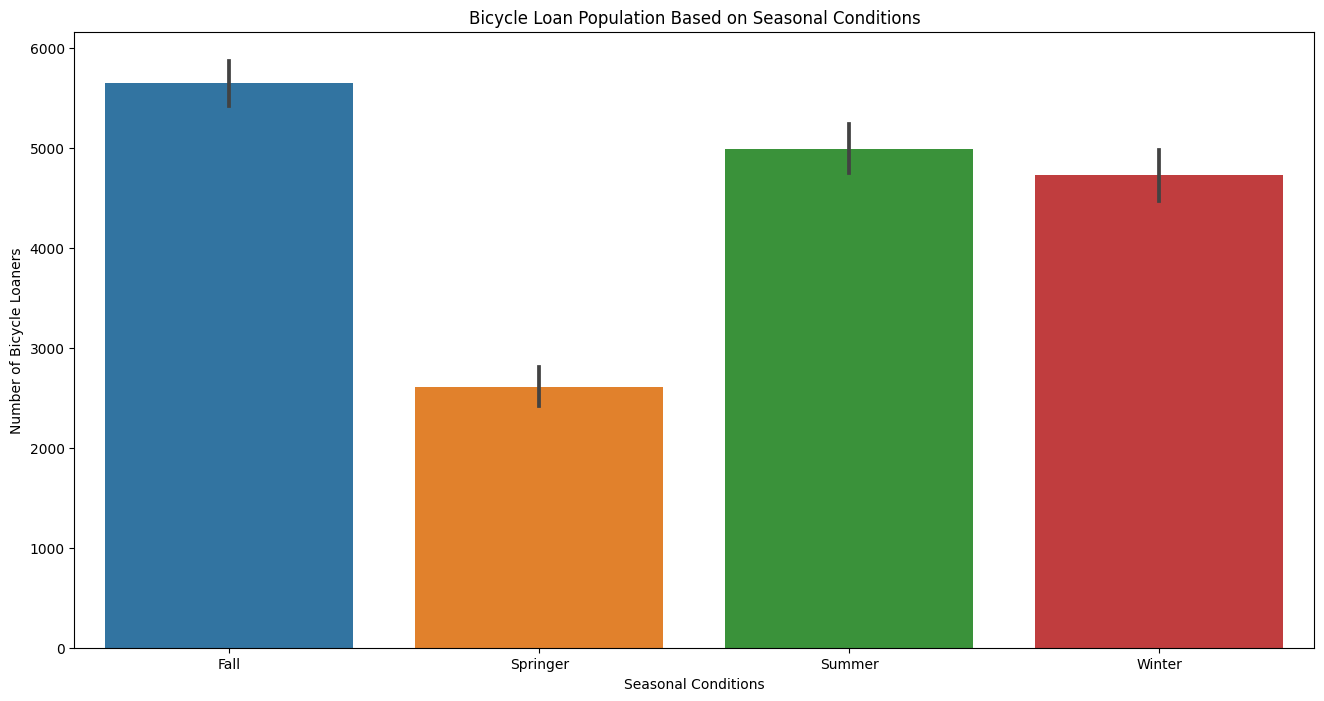

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x='season', y='count', data=day)

plt.title('Bicycle Loan Population Based on Seasonal Conditions')
plt.xlabel('Seasonal Conditions')
plt.ylabel('Number of Bicycle Loaners')
plt.show()

###**Question 3: How does the weather affect the number of bike loans?**

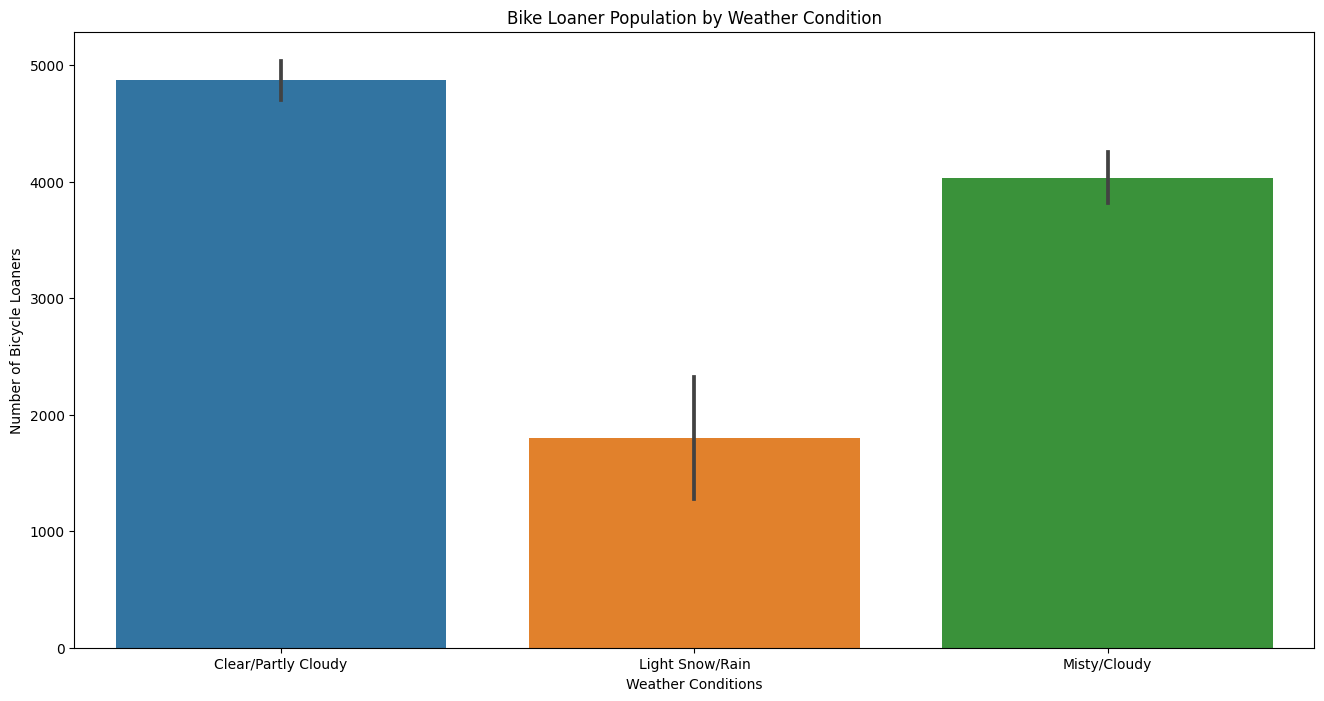

In [22]:
plt.figure(figsize=(16, 8))
sns.barplot(x='weathersit', y='count', data=day)

plt.title('Bike Loaner Population by Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Bicycle Loaners')
plt.show()

### **Question 4: What is the population of bicycle loaners on holidays and weekdays by registered and casual?**

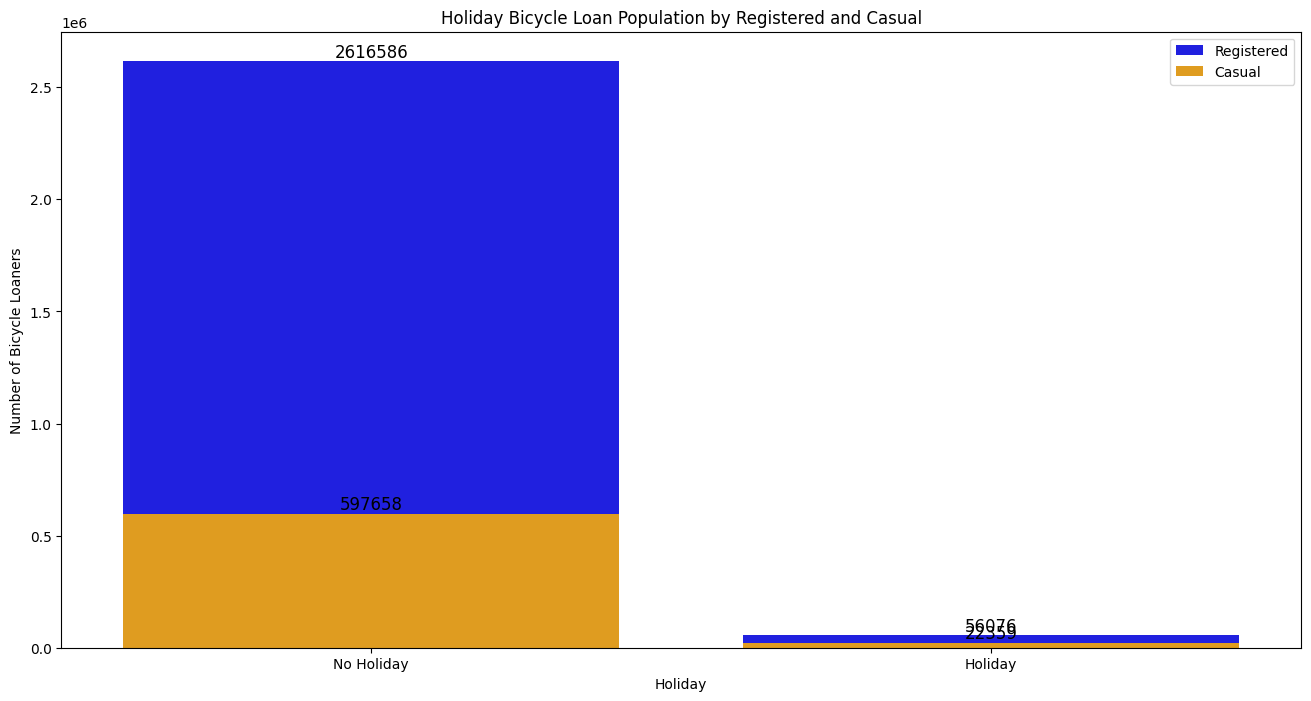

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))

bike_rental = day[['holiday', 'registered', 'casual']]
result = bike_rental.groupby('holiday').sum().reset_index()

sns.barplot(x='holiday', y='registered', data=result, label='Registered', color='blue', ax=ax)
sns.barplot(x='holiday', y='casual', data=result, label='Casual', color='orange', ax=ax)

for index, row in result.iterrows():
    ax.text(index, row['registered'], str(row['registered']), ha='center', va='bottom', fontsize=12)
    ax.text(index, row['casual'], str(row['casual']), ha='center', va='bottom', fontsize=12)

plt.title('Holiday Bicycle Loan Population by Registered and Casual')
plt.xlabel('Holiday')
plt.ylabel('Number of Bicycle Loaners')
plt.xticks(range(0, 2), ['No Holiday', 'Holiday'], rotation=0)
plt.legend()
plt.show()

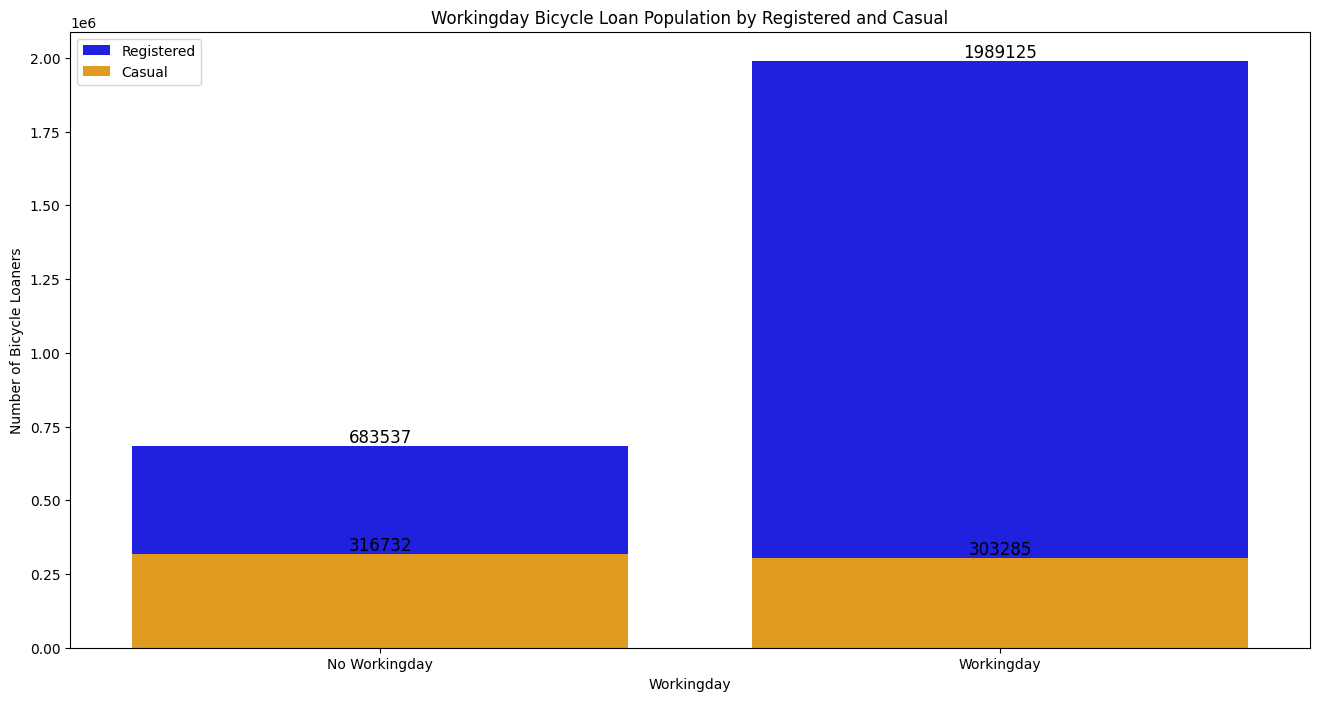

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

bike_rental = day[['workingday', 'registered', 'casual']]
result2 = bike_rental.groupby('workingday').sum().reset_index()

sns.barplot(x='workingday', y='registered', data=result2, label='Registered', color='blue', ax=ax)
sns.barplot(x='workingday', y='casual', data=result2, label='Casual', color='orange', ax=ax)

for index, row in result2.iterrows():
    ax.text(index, row['registered'], str(row['registered']), ha='center', va='bottom', fontsize=12)
    ax.text(index, row['casual'], str(row['casual']), ha='center', va='bottom', fontsize=12)

plt.title('Workingday Bicycle Loan Population by Registered and Casual')
plt.xlabel('Workingday')
plt.ylabel('Number of Bicycle Loaners')
plt.xticks(range(0, 2), ['No Workingday', 'Workingday'], rotation=0)
plt.legend()
plt.show()

### **Question 5: What is the Weekday Bicycle Loan Population?**

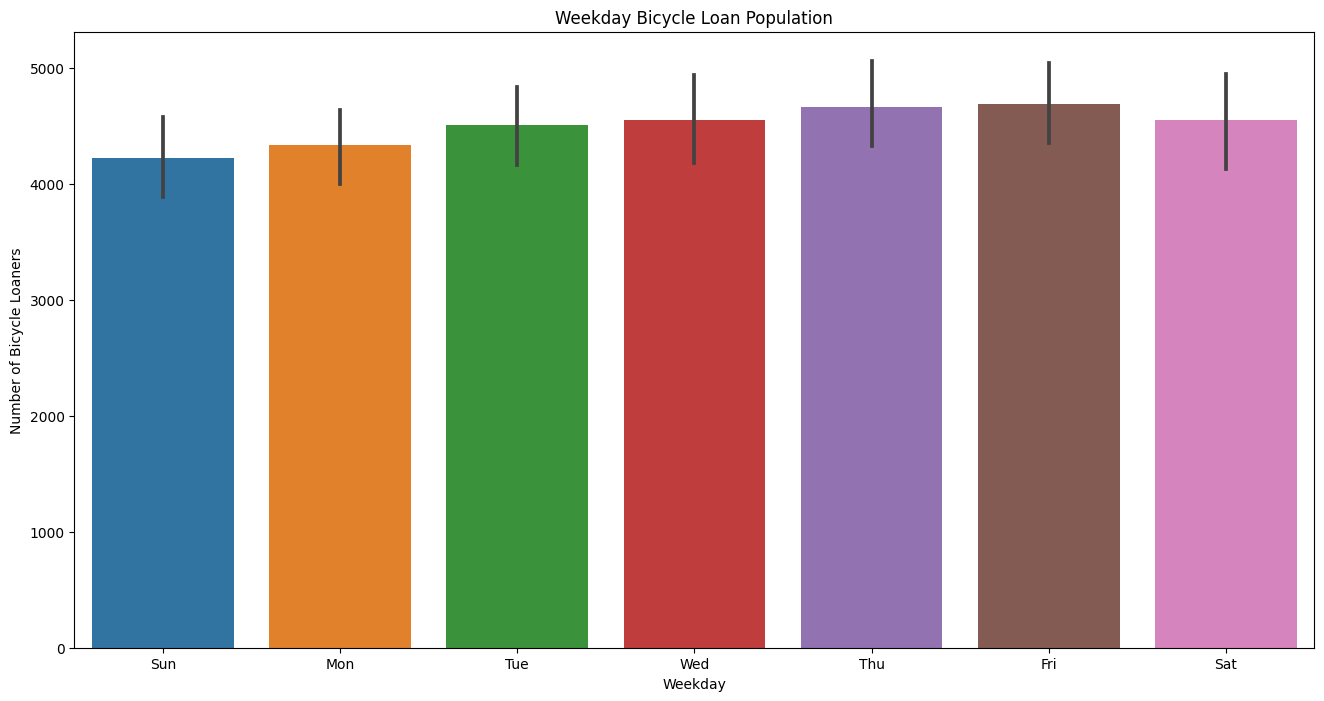

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x='weekday', y='count', data=day)

plt.title('Weekday Bicycle Loan Population')
plt.xlabel('Weekday')
plt.ylabel('Number of Bicycle Loaners')
plt.xticks(range(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=0)
plt.show()

### **Question 6: How do the attributes temp, atemp and humidity affect the number of bike loans?**

Text(0.5, 1.0, 'Humidity vs Count')

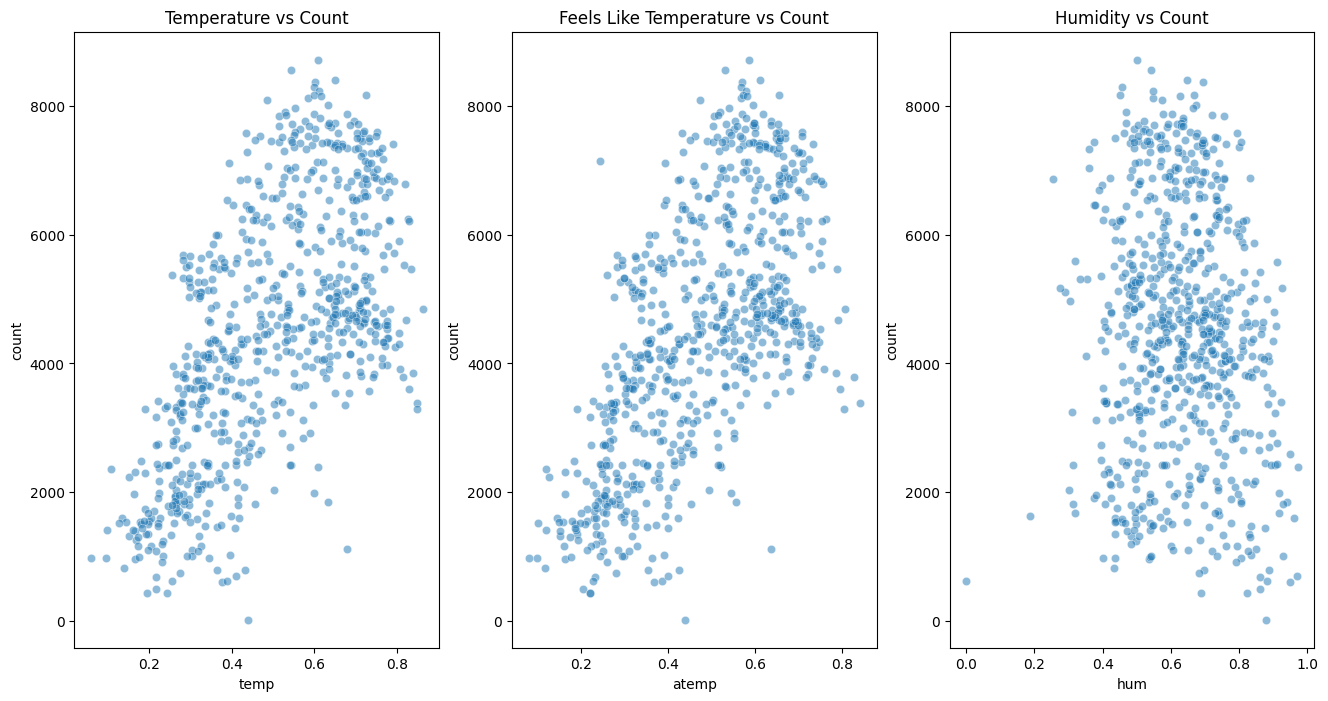

In [26]:
plt.figure(figsize=(16, 8))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='count', data=day, alpha=0.5)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(x='atemp', y='count', data=day, alpha=0.5)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(x='hum', y='count', data=day, alpha=0.5)
plt.title('Humidity vs Count')

## **Conclusion**

- **QUESTION 1**: Based on the results from the visualization, the number of bicycle loans during the period January to December in 2011 to 2012. The peak number of bike loans was recorded in July, while January recorded the lowest number of bike loans.

- **QUESTION 2**: Bicycle borrowing increased during the fall season, compared to other seasons, and then during the spring season the bicycle borrowing population decreased.

- **QUESTION 3**: Based on the visualization above, the bicycle loan population based on weather conditions, there is a significant increase in **Clear/Partly Cloudy** weather. However, during Misty/Cloudy weather, the number of bike loans slightly decreased. In addition, in Light snow/Rain weather, the number of bike loans decreased further.

- **QUESTION 4**:
  - The population of 'non-holiday' bicycle loaners is dominated by registered users at around 2.616.586, while the number of bicycle loaners by casual users is only 597.658. This shows that registered users are more likely to use the bicycle loan service during non-holiday periods. There was a significant decrease in the bicycle lending population during the 'holiday' period, with only 56.076 registered users, and only 22.359 casual users.

  - The bicycle lending population during 'No Workingday', registered users contributed the most with 683.537 users, while casual users only 316.732 users and the bicycle lending population during 'Workingday', registered users borrowed more bicycles, which was 1.989.125, compared to casual users who only 303.285.

  - From these two visualizations, it can be concluded that bicycle borrowing will increase during weekdays, which may be due to users borrowing bicycles as accommodation to get to the office or their activities during work.

- **QUESTION 5**: Friday is the day with the highest population of bicycle borrowers, while Sunday has a decrease in bicycle borrowers compared to other days.

- **QUESTION 6**: In the temp and atemp attributes, it can be concluded that both attributes have a positive correlation with the count attribute, which can indicate that temperature can affect the number of bicycle loans while the humidity attribute has a negative correlation with the count attribute.